In [1]:
# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import  Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score, f1_score
from keras import callbacks
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

In [72]:
import sys
sys.version

'3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]'

In [73]:
!python --version

Python 3.10.9


In [8]:
# Import Data

In [9]:
data= pd.read_csv('promoters.data',names=['Class', 'Instance_Name', 'Sequence'])

In [10]:
data

,Class,Instance_Name,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Class          106 non-null    object
 1   Instance_Name  106 non-null    object
 2   Sequence       106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [12]:
data.describe()

,Class,Instance_Name,Sequence
count,106,106,106
unique,2,106,106
top,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
freq,53,1,1


In [13]:
for i in data.columns:
    print(i,':',data[i].nunique())

Class : 2
Instance_Name : 106
Sequence : 106


In [14]:
# Exploratory analysis

<Axes: ylabel='Class'>

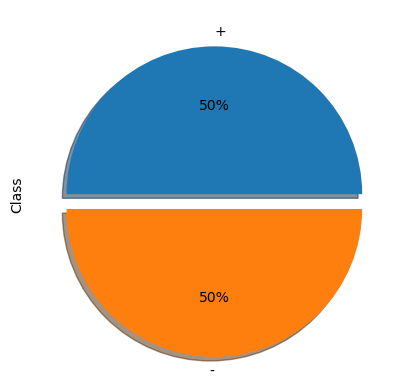

In [15]:
data['Class'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct='%.0f%%')

* Balenced data

In [16]:
data

,Class,Instance_Name,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [17]:
data

,Class,Instance_Name,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [18]:
# Remove tabs and spaces from the 'Sequence' column
data['Sequence'] = [item.replace('\t', '').strip() for item in data['Sequence']]


In [19]:
# Split the 'Sequence' column into multiple columns
split_data = data['Sequence'].str.split('', expand=True)
split_data

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,,t,a,c,t,a,g,c,a,a,...,g,c,t,t,g,t,c,g,t,
1,,t,g,c,t,a,t,c,c,t,...,c,a,t,c,g,c,c,a,a,
2,,g,t,a,c,t,a,g,a,g,...,c,a,c,c,c,g,g,c,g,
3,,a,a,t,t,g,t,g,a,t,...,a,a,c,a,a,a,c,t,c,
4,,t,c,g,a,t,a,a,t,t,...,c,c,g,t,g,g,t,a,g,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,,c,c,t,c,a,a,t,g,g,...,g,a,a,c,t,a,t,a,t,
102,,g,t,a,t,t,c,t,c,a,...,t,c,a,a,c,a,t,t,g,
103,,c,g,c,g,a,c,t,a,c,...,a,a,g,g,c,t,t,c,c,
104,,c,t,c,g,t,c,c,t,c,...,a,g,g,a,g,g,a,a,c,


In [20]:
# Drop columns 0 and 58
split_data.drop(columns=[0, 58], inplace=True)
# Rename columns from 0 to 57
new_column_names = [str(i) for i in range(0, 57)]
split_data.columns = new_column_names


In [21]:
# Concatenate split_data with the 'Class' column
df = pd.concat([split_data, data['Class']], axis=1)

In [22]:
# def preprocess_data(data):
#     # Remove tabs and spaces from the 'Sequence' column
#     data['Sequence'] = [item.replace('\t', '').strip() for item in data['Sequence']]
#     # Split the 'Sequence' column into multiple columns
#     split_data = data['Sequence'].str.split('', expand=True)
#     if split_data.iloc[:, 0].eq('').all():
#         # Drop columns 0 and 58
#         split_data.drop(columns=[0, 58], inplace=True)
#         # Rename columns from 0 to 57
#         new_column_names = [str(i) for i in range(0, 57)]
#         split_data.columns = new_column_names
#     # Concatenate split_data with the 'Class' column
# df = pd.concat([split_data, data['Class']], axis=1)


In [23]:
split_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56'],
      dtype='object')

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [25]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       106 non-null    object
 1   1       106 non-null    object
 2   2       106 non-null    object
 3   3       106 non-null    object
 4   4       106 non-null    object
 5   5       106 non-null    object
 6   6       106 non-null    object
 7   7       106 non-null    object
 8   8       106 non-null    object
 9   9       106 non-null    object
 10  10      106 non-null    object
 11  11      106 non-null    object
 12  12      106 non-null    object
 13  13      106 non-null    object
 14  14      106 non-null    object
 15  15      106 non-null    object
 16  16      106 non-null    object
 17  17      106 non-null    object
 18  18      106 non-null    object
 19  19      106 non-null    object
 20  20      106 non-null    object
 21  21      106 non-null    object
 22  22      106 non-null    ob

In [27]:
x=df.iloc[:,0:57]
x

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,g,a,a,c,t,a,t,a,t
102,g,t,a,t,t,c,t,c,a,a,...,t,t,c,a,a,c,a,t,t,g
103,c,g,c,g,a,c,t,a,c,g,...,c,a,a,g,g,c,t,t,c,c
104,c,t,c,g,t,c,c,t,c,a,...,a,a,g,g,a,g,g,a,a,c


In [28]:
y=df.iloc[:,57]
y

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Dataset_Train_Test_Split </h2>
</div>

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 0)

 ## Feature Engineering
The FE method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_train= pd.DataFrame(encoder.fit_transform(x_train).toarray())
X_test = pd.DataFrame(encoder.fit_transform(x_test).toarray())

In [31]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
70,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
72,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
Y_train = np.where(y_train == '+',1,0)
Y_test = np.where(y_test == '+',1,0)

In [34]:
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

In [35]:
Y_train

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1.], dtype=float32)

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Model Building </h2>
</div>

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Model 1.0 </h2>
</div>

In [36]:
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(228,)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# Add more hidden layers as needed

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification


In [37]:
early_stopping_val_accuracy =callbacks.EarlyStopping(monitor='val_accuracy',
    verbose=1,patience=5, mode='max', restore_best_weights=True)
early_stopping_val_loss = callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=5, mode='min', restore_best_weights=True)


<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Model Compile & Validation </h2>
</div>

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision','Recall', 'F1Score'])

In [39]:
history=model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping_val_accuracy,early_stopping_val_loss])

Epoch 1/100
2/2 [==============================] - 2s 507ms/step - loss: 0.6941 - accuracy: 0.5254 - precision: 0.8000 - recall: 0.1290 - f1_score: 0.6889 - val_loss: 0.6830 - val_accuracy: 0.4667 - val_precision: 0.3750 - val_recall: 0.5000 - val_f1_score: 0.5714
Epoch 2/100
2/2 [==============================] - 0s 56ms/step - loss: 0.6173 - accuracy: 0.8475 - precision: 0.9583 - recall: 0.7419 - f1_score: 0.6889 - val_loss: 0.6768 - val_accuracy: 0.4667 - val_precision: 0.4000 - val_recall: 0.6667 - val_f1_score: 0.5714
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.5593 - accuracy: 0.9831 - precision: 1.0000 - recall: 0.9677 - f1_score: 0.6889 - val_loss: 0.6688 - val_accuracy: 0.4667 - val_precision: 0.4000 - val_recall: 0.6667 - val_f1_score: 0.5714
Epoch 4/100
2/2 [==============================] - 0s 55ms/step - loss: 0.5047 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.6889 - val_loss: 0.6519 - val_accuracy: 0.4667 - val_preci

In [40]:
history_df=pd.DataFrame(history.history)
history_df

,loss,accuracy,precision,recall,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_f1_score
0,0.694065,0.525424,0.800000,0.129032,[0.68888885],0.682954,0.466667,0.375000,0.500000,[0.5714286]
1,0.617259,0.847458,0.958333,0.741935,[0.68888885],0.676795,0.466667,0.400000,0.666667,[0.5714286]
2,0.559316,0.983051,1.000000,0.967742,[0.68888885],0.668832,0.466667,0.400000,0.666667,[0.5714286]
3,0.504724,1.000000,1.000000,1.000000,[0.68888885],0.651862,0.466667,0.400000,0.666667,[0.5714286]
4,0.445931,1.000000,1.000000,1.000000,[0.68888885],0.630326,0.533333,0.444444,0.666667,[0.5714286]
5,0.384980,1.000000,1.000000,1.000000,[0.68888885],0.610981,0.533333,0.444444,0.666667,[0.5714286]
6,0.324571,1.000000,1.000000,1.000000,[0.68888885],0.588121,0.600000,0.500000,0.666667,[0.5714286]
7,0.264134,1.000000,1.000000,1.000000,[0.68888885],0.574294,0.600000,0.500000,0.666667,[0.5714286]
8,0.207535,1.000000,1.000000,1.000000,[0.68888885],0.562495,0.600000,0.500000,0.666667,[0.5714286]
9,0.156798,1.000000,1.000000,1.000000,[0.68888885],0.555865,0.666667,0.571429,0.666667,[0.5714286]


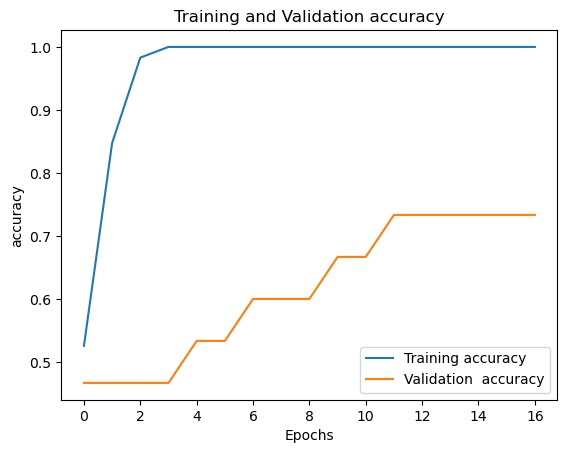

In [41]:
plt.plot(history_df.loc[:,['accuracy']],label='Training accuracy')
plt.plot(history_df.loc[:,['val_accuracy']],label='Validation  accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

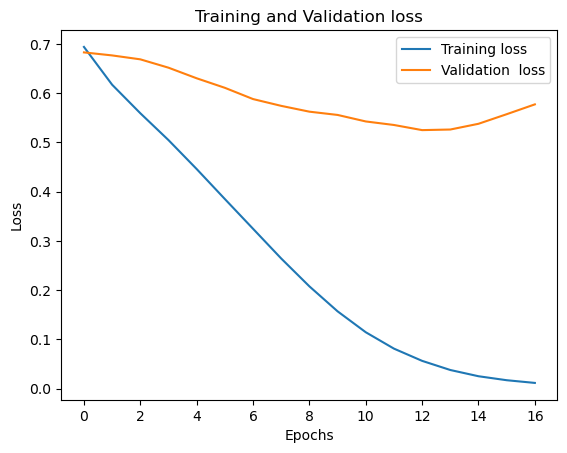

In [42]:
plt.plot(history_df.loc[:,['loss']],label='Training loss')
plt.plot(history_df.loc[:,['val_loss']],label='Validation  loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Model 1.1 </h2>
</div>

In [56]:
model1=Sequential()
# layers
model1.add(Dense(128,activation='relu',input_dim=228))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
# model1.add(Dropout(0.5))
model1.add(Dense(16,activation='relu'))
# model1.add(Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))
model1.add(Dropout(0.5))
# model1.add(Dense(4, activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))


<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Model Compile & Validation </h2>
</div>

In [57]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision','Recall', 'F1Score'])

In [58]:
history1=model1.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.2,callbacks=[early_stopping_val_accuracy,early_stopping_val_loss])

Epoch 1/40
2/2 [==============================] - 2s 439ms/step - loss: 0.7022 - accuracy: 0.4407 - precision: 0.4375 - recall: 0.2258 - f1_score: 0.6889 - val_loss: 0.6805 - val_accuracy: 0.6667 - val_precision: 1.0000 - val_recall: 0.1667 - val_f1_score: 0.5714
Epoch 2/40
2/2 [==============================] - 0s 60ms/step - loss: 0.6790 - accuracy: 0.6102 - precision: 0.7222 - recall: 0.4194 - f1_score: 0.6889 - val_loss: 0.6714 - val_accuracy: 0.6000 - val_precision: 0.5000 - val_recall: 0.1667 - val_f1_score: 0.5714
Epoch 3/40
2/2 [==============================] - 0s 63ms/step - loss: 0.6267 - accuracy: 0.8136 - precision: 0.8846 - recall: 0.7419 - f1_score: 0.6889 - val_loss: 0.6617 - val_accuracy: 0.6667 - val_precision: 0.6667 - val_recall: 0.3333 - val_f1_score: 0.5714
Epoch 4/40
2/2 [==============================] - 0s 60ms/step - loss: 0.6106 - accuracy: 0.7797 - precision: 0.8462 - recall: 0.7097 - f1_score: 0.6889 - val_loss: 0.6315 - val_accuracy: 0.6667 - val_precision

In [59]:
history_train=pd.DataFrame(history1.history)
history_train

,loss,accuracy,precision,recall,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_f1_score
0,0.702178,0.440678,0.437500,0.225806,[0.68888885],0.680509,0.666667,1.000000,0.166667,[0.5714286]
1,0.678974,0.610169,0.722222,0.419355,[0.68888885],0.671449,0.600000,0.500000,0.166667,[0.5714286]
2,0.626729,0.813559,0.884615,0.741935,[0.68888885],0.661670,0.666667,0.666667,0.333333,[0.5714286]
3,0.610571,0.779661,0.846154,0.709677,[0.68888885],0.631474,0.666667,0.666667,0.333333,[0.5714286]
4,0.543179,0.830508,0.920000,0.741935,[0.68888885],0.588115,0.733333,1.000000,0.333333,[0.5714286]
5,0.534188,0.728814,0.857143,0.580645,[0.68888885],0.553372,0.733333,0.750000,0.500000,[0.5714286]
6,0.471267,0.762712,0.947368,0.580645,[0.68888885],0.516366,0.733333,0.750000,0.500000,[0.5714286]
7,0.354371,0.932203,1.000000,0.870968,[0.68888885],0.478450,0.866667,0.833333,0.833333,[0.5714286]
8,0.287296,0.949153,0.937500,0.967742,[0.68888885],0.414376,0.866667,0.833333,0.833333,[0.5714286]
9,0.204365,0.983051,1.000000,0.967742,[0.68888885],0.358450,0.866667,0.833333,0.833333,[0.5714286]


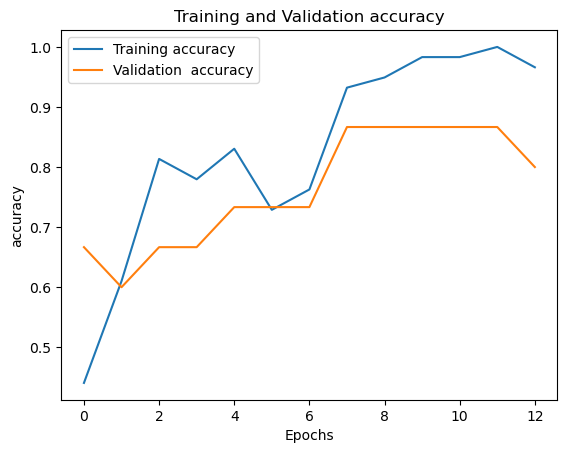

In [60]:
plt.plot(history_train.loc[:,['accuracy']],label='Training accuracy')
plt.plot(history_train.loc[:,['val_accuracy']],label='Validation  accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

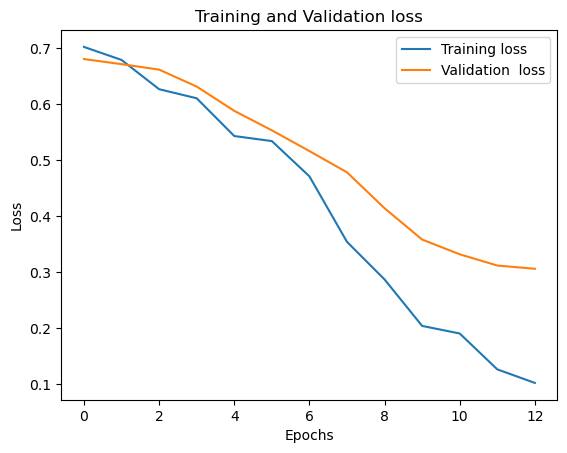

In [61]:
plt.plot(history_train.loc[:,['loss']],label='Training loss')
plt.plot(history_train.loc[:,['val_loss']],label='Validation  loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Test Data Validation </h2>
</div>

In [62]:
history_test=model1.fit(X_test, Y_test, epochs=100, batch_size=32)

Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4687 - accuracy: 0.8125 - precision: 0.8571 - recall: 0.7500 - f1_score: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3967 - accuracy: 0.8750 - precision: 1.0000 - recall: 0.7500 - f1_score: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3218 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - f1_score: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3374 - accuracy: 0.9062 - precision: 1.0000 - recall: 0.8125 - f1_score: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2138 - accuracy: 0.9688 - precision: 1.0000 - recall: 0.9375 - f1_score: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2167 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.12

In [63]:
model1.evaluate(X_test, Y_test)
# print(f'Test accuracy: {accuracy}')

1/1 [==============================] - 0s 37ms/step - loss: 9.1165e-10 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 1.0000


[9.11646369505803e-10, 1.0, 1.0, 1.0, array([1.], dtype=float32)]

In [64]:
history_test=pd.DataFrame(history_test.history)
history_test

,loss,accuracy,precision,recall,f1_score
0,0.468724,0.81250,0.857143,0.7500,[0.6666667]
1,0.396661,0.87500,1.000000,0.7500,[0.6666667]
2,0.321809,0.93750,0.937500,0.9375,[0.6666667]
3,0.337363,0.90625,1.000000,0.8125,[0.6666667]
4,0.213846,0.96875,1.000000,0.9375,[0.6666667]
...,...,...,...,...,...
95,0.021733,1.00000,1.000000,1.0000,[0.84210527]
96,0.021788,1.00000,1.000000,1.0000,[0.9142857]
97,0.000003,1.00000,1.000000,1.0000,[0.94117653]
98,0.022408,0.96875,0.941176,1.0000,[0.9142857]


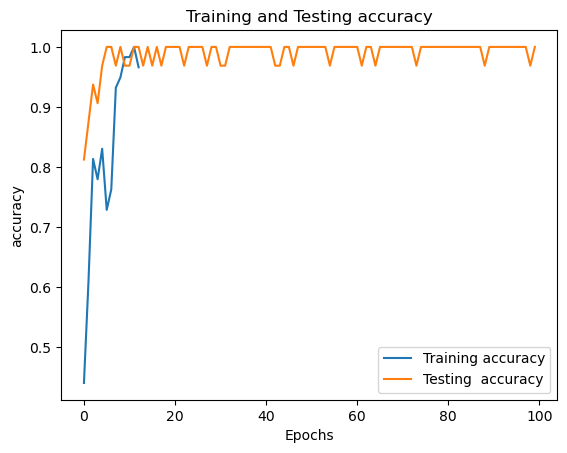

In [65]:
plt.plot(history_train.loc[:,['accuracy']],label='Training accuracy')
plt.plot(history_test.loc[:,['accuracy']],label='Testing  accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [66]:
import pickle
pickle.dump(model1,open('final_Model1.pkl','wb'))
pickle.dump(encoder,open('final_encoder1.pkl','wb'))
model = pickle.load(open('final_Model1.pkl','rb'))
encoder = pickle.load(open('final_encoder1.pkl','rb'))

In [67]:
tt=np.array(df.iloc[:1,:57])

In [68]:
ts='ATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCG'
len(ts)

52

In [69]:
tt

array([['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g',
        'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g',
        'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't',
        'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't',
        'g', 't', 'c', 'g', 't']], dtype=object)

In [70]:
enc=encoder.transform(tt)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [420]:
model.predict(enc)

1/1 [==============================] - 0s 139ms/step


array([[1.]], dtype=float32)

In [340]:
# '+'--->1
# '-'-->0

In [429]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [432]:
data.iloc[4,2]

'tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag'

In [437]:
ts='tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag'
len(ts)

57

In [440]:
data = pd.DataFrame({'Sequence': ts}, index=[range(0,1)])
split_data = data['Sequence'].str.split('', expand=True)
# Drop columns 0 and 58
split_data.drop(columns=[0, 58], inplace=True)
# Rename columns from 0 to 57
new_column_names = [str(i) for i in range(0, 57)]
split_data.columns = new_column_names

# reshaped_sequence = np.array(sequence).reshape(1, -1)

one_hot_encoder = pickle.load(open('final_encoder1.pkl', 'rb'))
ecoli_model = pickle.load(open('final_Model1.pkl', 'rb')) 
encoded_sequence = one_hot_encoder.transform(split_data)
# Make predictions using the loaded model

prediction = ecoli_model.predict(encoded_sequence)
affected_by_ecoli = prediction > 0.5  # Example threshold for binary classification


1/1 [==============================] - 1s 1s/step


In [441]:
data

,Sequence
(0),tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...


In [442]:
split_data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
(0),t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [443]:
encoded_sequence

<1x228 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [444]:
prediction

array([[1.]], dtype=float32)

In [445]:
import sklearn
print(sklearn.__version__)

1.2.1
